In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Importing the dataset

data= pd.read_csv('Combined 18-19 data.csv')
print(data)

       Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2018      1    1     0       0    0             0           0   
1      2018      1    1     0      30    0             0           0   
2      2018      1    1     1       0    0             0           0   
3      2018      1    1     1      30    0             0           0   
4      2018      1    1     2       0    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35035  2019     12   31    21      30    0             0           4   
35036  2019     12   31    22       0    0             0           0   
35037  2019     12   31    22      30    0             0           0   
35038  2019     12   31    23       0    0             0           0   
35039  2019     12   31    23      30    0             0           0   

       Dew Point  Solar Zenith Angle  Fill Flag  Surface Albedo  Wind Speed  \
0          -10.1              166.39          0         

In [3]:
# shape of the dataset (row,column)
data.shape

(35040, 18)

In [4]:
# Columns 
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [5]:
data.corr()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
Year,1.000000e+00,2.308433e-18,-8.068573e-20,0.000000e+00,0.000000,-0.010851,0.002349,0.013416,-0.006990,-0.000009,0.049439,3.629407e-02,0.023873,-0.095768,-0.016601,0.107005,-0.065982,-0.071962
Month,2.308433e-18,1.000000e+00,1.189318e-02,-6.797109e-20,0.000000,-0.022796,-0.041176,-0.129527,-0.032581,0.045521,-0.045237,-9.725078e-02,-0.085939,0.086458,-0.067649,-0.169933,0.148847,0.034519
Day,-8.068573e-20,1.189318e-02,1.000000e+00,4.555872e-18,0.000000,0.003284,0.001434,-0.028035,-0.019776,-0.001291,-0.004215,1.006644e-02,0.047162,-0.040871,0.007317,-0.010884,-0.024865,-0.043793
Hour,0.000000e+00,-6.797109e-20,4.555872e-18,1.000000e+00,0.000000,-0.009629,-0.007665,0.024086,-0.024431,0.015341,0.003607,5.404524e-19,-0.006074,-0.009446,-0.021177,-0.159604,0.137094,-0.074751
Minute,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.000530,-0.000089,-0.000283,0.000003,-0.000007,-0.009973,0.000000e+00,0.002443,0.000136,-0.000718,-0.002133,0.001589,-0.000166
GHI,-1.085105e-02,-2.279605e-02,3.284076e-03,-9.629139e-03,-0.000530,1.000000,0.967025,-0.236000,-0.012364,-0.855308,-0.044687,4.575365e-03,0.399265,0.068513,-0.226899,-0.481934,0.551419,-0.056500
Clearsky GHI,2.349047e-03,-4.117566e-02,1.434025e-03,-7.665075e-03,-0.000089,0.967025,1.000000,-0.128422,0.011873,-0.891214,-0.004643,1.228602e-02,0.425615,0.101317,-0.223068,-0.460648,0.538903,-0.080816
Cloud Type,1.341618e-02,-1.295267e-01,-2.803477e-02,2.408561e-02,-0.000283,-0.236000,-0.128422,1.000000,0.124669,0.123076,0.276926,4.243552e-02,-0.081290,0.142339,0.022512,0.324736,-0.227252,-0.024625
Dew Point,-6.990299e-03,-3.258076e-02,-1.977621e-02,-2.443100e-02,0.000003,-0.012364,0.011873,0.124669,1.000000,-0.076074,0.063350,2.724292e-03,-0.057562,0.833202,0.098486,0.363408,0.395604,-0.293172
Solar Zenith Angle,-9.249552e-06,4.552134e-02,-1.290791e-03,1.534073e-02,-0.000007,-0.855308,-0.891214,0.123076,-0.076074,1.000000,-0.111023,-1.359140e-02,-0.396466,-0.149125,0.207498,0.476999,-0.577441,0.118417


High Corrolation

Clearsky GHI = 0.93
Solar Zenith Angle = -0.91

In [6]:
# new dataframe
data= data[['Year', 'Month', 'Day', 'Hour', 'Minute','GHI','Cloud Type', 'Dew Point', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure']]
data.head()

,Year,Month,Day,Hour,Minute,GHI,Cloud Type,Dew Point,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2018,1,1,0,0,0,0,-10.1,0,0.17,1.5,0.6,4,26.75,7.9,948
1,2018,1,1,0,30,0,0,-10.1,0,0.17,1.5,0.6,181,27.68,7.4,948
2,2018,1,1,1,0,0,0,-9.5,0,0.17,1.6,0.6,357,30.04,6.9,948
3,2018,1,1,1,30,0,0,-9.5,0,0.17,1.6,0.6,356,30.87,6.5,948
4,2018,1,1,2,0,0,0,-8.8,0,0.17,1.6,0.6,354,33.18,6.2,948


### Model Building 

In [7]:
# Dependent and Independent variable

X = data.drop('GHI',axis=1) # Independet variable
y = data['GHI'] # dependent variable

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [9]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (28032, 15)
X_test dimension=  (7008, 15)
y_train dimension=  (28032,)
y_train dimension=  (7008,)


In [61]:
from xgboost import XGBRegressor
import xgboost as xg

In [62]:
# Fitting XGBoost to the dataset

xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [63]:
# Train Accuracy
xgb.score(X_train,y_train)

0.9950436300988814

In [64]:
# Test Accuracy
xgb.score(X_test,y_test)

0.9875941350996172

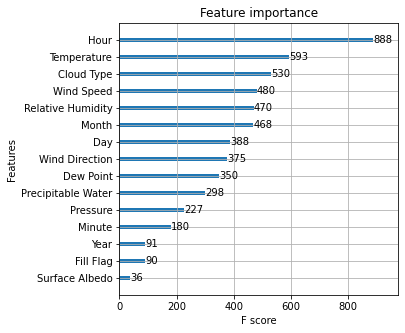

In [65]:
xg.plot_importance(xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [66]:
# Checking Mean Absolute Error, Mean Squared Error, Root MSE for (Test data) 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 17.496451346786294
MSE: 1253.0355547663876
RMSE: 35.39824225532092


In [67]:
predictions = xgb.predict(X_test)

In [68]:
predictions # Prediction for the X_test data

array([ 31.629078, 344.77185 , 327.81433 , ..., 758.7285  ,   8.520361,
       583.4329  ], dtype=float32)

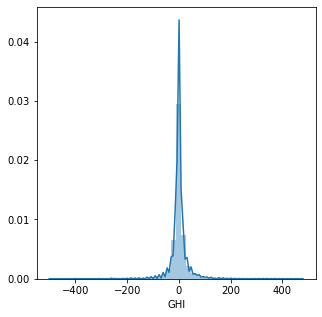

In [69]:
sns.distplot(y_test-predictions) 
# y_test = Actual Value, It should be minimal. Since it is minimal we are getting this close Gaussian Distribution graph
# That means difference is very minimal 
# It is forming a normal distribution

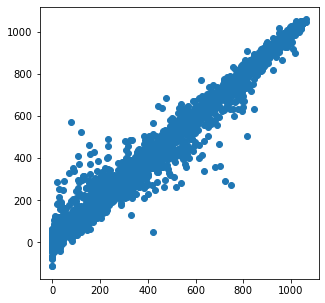

In [70]:
plt.scatter(y_test,predictions) # It is linear. That means prediction is pretty much good

### Deployment

Saving the model

In [73]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("xgb1.pkl","wb")
pickle.dump(xgb, pickle_out)